In [20]:
from pymongo import MongoClient
import gridfs
import cv2
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt

In [57]:
# access our image collection
client = MongoClient('localhost', 27017)
db = client['ImageDatabase']
imageCollection = db['ImageCollection']

In [58]:
fs = gridfs.GridFS(db)

In [59]:

im = Image.open("images/imran.jpg")
image_bytes = io.BytesIO()
im.save(image_bytes, format='JPEG')

In [72]:
np.array(im).shape

(768, 629, 3)

## Store the Image

In [60]:
imageID = fs.put(image_bytes.getvalue(), filename="file")

# create our image meta data
meta = {
    'imageID': imageID,
    'name': 'imran',
    'shape': np.array(im).shape
}

# insert the meta data
imageCollection.insert_one(meta)

## Get the Image

In [80]:
image = imageCollection.find_one({'name': 'imran'})
gOut = fs.get(image['imageID'])
img_bytes = io.BytesIO(gOut.read())

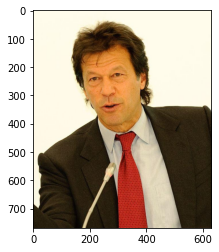

In [81]:
pil_img = Image.open(img_bytes)
plt.imshow(pil_img)
plt.show()